
# Linear regression with one variable

This Matlab code has been completed as part of [Machine Learning](https://www.coursera.org/learn/machine-learning)
course in Coursera given by Prof. Andrew Ng

------------
In this part, linear regression with one variable is implemented to predict profits for a food truck. The data is from the file data_01_LR_singlevariable.txt, which contains the first column as the population of a city and the second column as
the profit of a food truck in that city. A negative value for profit indicates a loss.

This notebook includes:

- <a href='#plot'>Part 1: Plotting the Data</a>
- <a href='#gd'>Part 2: Gradient descent</a>
- <a href='#results'>Part 3: Visualizing results</a>
- <a href='#Jtheta'>Part 4: Visualizing $J(\theta)$</a>

In [1]:
clear all; close all; clc; warning off;
addpath('../data/') % add path to directory containing data files
addpath('./funcs/') % add path to directory containing subfunction files

## Part 1: Plotting the Data <a id='plot'></a>
Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). (Many
other problems that you will encounter in real life are multi-dimensional and can’t be plotted on a 2-d plot.)

The dataset is loaded from the data file into the variables X and y:
* x refers to the population size in 10,000s
* y refers to the profit in $10,000s


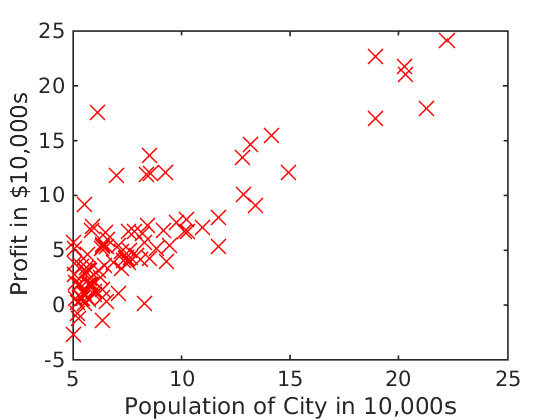

In [2]:
data = load('data_01_LR_singlevariable.txt');
X = data(:, 1); y = data(:, 2);
m = length(y); % number of training examples

% Plot Data
fig1=figure();
plot(X, y, 'rx', 'MarkerSize', 10);
ylabel('Profit in $10,000s'); % Set the y−axis label
xlabel('Population of City in 10,000s'); % Set the x−axis label

## Part 2: Gradient descent <a id='gd'></a>
This part fits the linear regression parameters $\theta$ to the current dataset using gradient descent.

**Update equations**:

The objective of LR is to minimize the cost function: $$J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}\left( h_{\theta} \left(x^{(i)}\right) - y^{(i)} \right)^2$$ where the hypothesis $h_{\theta} (x)$ is given by the linear model $$h_{\theta} (x)=\theta^Tx=\theta_0+\theta_1x_1$$.

Recall that the parameters of the model are the $\theta_j$ values. These are the values you will adjust to minimize cost $J(\theta)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update $$\theta_j:=\theta_j-\alpha\frac{1}{m}\sum_{i=1}^{m}\left( h_{\theta} \left(x^{(i)}\right) - y^{(i)}  \right)x_j^{(i)}$$

where $\alpha$ is the learning rate. One should simultaneously update $\theta_j$ for all j. After each step of gradient descent, parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost $J(\theta_j)$

In [3]:
X = [ones(m, 1), data(:,1)]; % Add a column of ones to x
theta = zeros(2, 1); % initialize fitting parameters

% Some gradient descent settings
num_iters = 1500;
alpha = 0.01;

% compute and display initial cost
computeCost = @(X, y, theta) 1/(2*size(X,1))*(X*theta-y)'*(X*theta-y);

% run gradient descent
J_history = zeros(num_iters, 1);
for iter = 1:num_iters
    theta=theta-alpha/m*X'*(X*theta-y);
    J_history(iter) = computeCost(X, y, theta);
end


## Part 3: Visualizing results  <a id='results'></a>

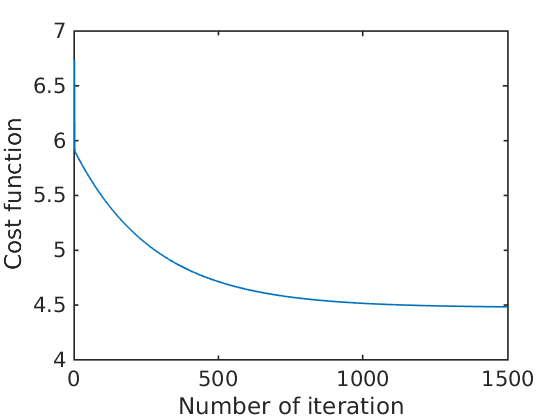

Theta found by gradient descent: -3.630291 1.166362

In [4]:
% check cost function
fig2=figure();
plot(J_history)
ylabel('Cost function'); % Set the y−axis label
xlabel('Number of iteration'); % Set the x−axis label

% print theta to screen
fprintf('Theta found by gradient descent: ');
fprintf('%f %f \n', theta(1), theta(2));


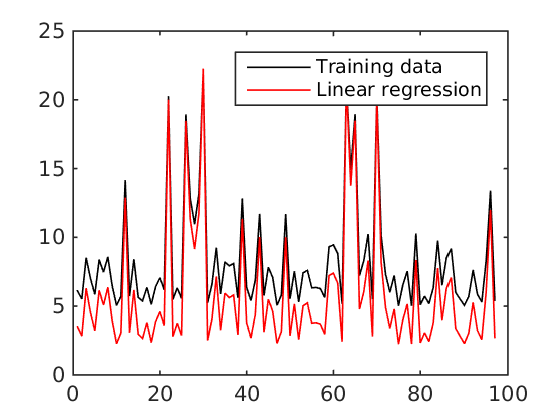

For population = 35,000, we predict a profit of 4519.767868
For population = 70,000, we predict a profit of 45342.450129

In [5]:
% Plot the linear fit
fig3=figure();
hold on; % keep previous plot visible
plot(X(:,2), 'k-')
plot(X*theta,'r-')
legend('Training data', 'Linear regression')
hold off % don't overlay any more plots on this figure

% Predict values for population sizes of 35,000 and 70,000
predict1 = [1, 3.5] *theta;
fprintf('For population = 35,000, we predict a profit of %f\n', predict1*10000);
predict2 = [1, 7] * theta;
fprintf('For population = 70,000, we predict a profit of %f\n',predict2*10000);
box on

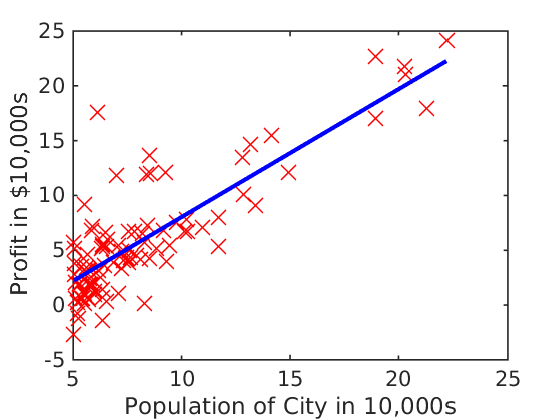

In [6]:
% Plot Linear Fit
fig1=figure();
hold on
plot(X(:,2:end), y, 'rx', 'MarkerSize', 10);
plot(X(:,2:end),X*theta, 'b-','LineWidth',2)
ylabel('Profit in $10,000s'); % Set the y−axis label
xlabel('Population of City in 10,000s'); % Set the x−axis label
box on

## Part 4: Visualizing $J(\theta)$ <a id='Jtheta'></a>

To understand the cost function J(θ) better, one can plot the cost over a 2-dimensional grid of $\theta_0$ and $\theta_1$ values.

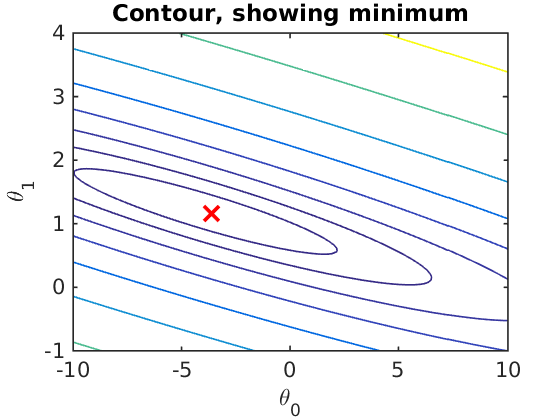

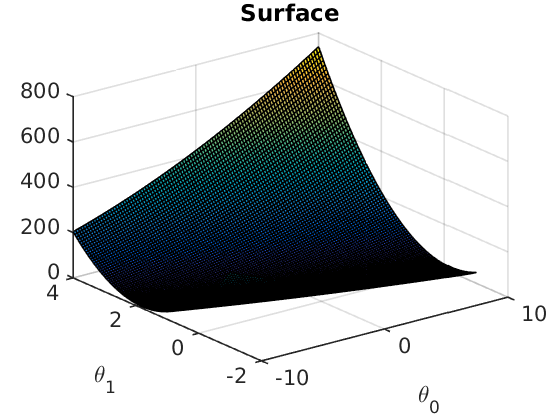

In [7]:
% Grid over which we will calculate J
theta0_vals = linspace(-10, 10, 100);
theta1_vals = linspace(-1, 4, 100);

% initialize J_vals to a matrix of 0's
J_vals = zeros(length(theta0_vals), length(theta1_vals));

% Fill out J_vals
for i = 1:length(theta0_vals)
    for j = 1:length(theta1_vals)
        t = [theta0_vals(i); theta1_vals(j)];    
        J_vals(i,j) = computeCost(X, y, t);
    end
end


% Because of the way meshgrids work in the surf command, we need to % transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals';
% Surface plot
figure;
surf(theta0_vals, theta1_vals, J_vals)
xlabel('\theta_0'); ylabel('\theta_1');
title('Surface')

% Contour plot
figure;
% Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
xlabel('\theta_0'); ylabel('\theta_1');
hold on;
plot(theta(1), theta(2), 'rx', 'MarkerSize', 10, 'LineWidth', 2);
title('Contour, showing minimum')